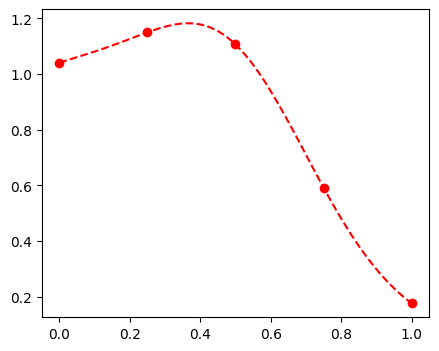

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5,4)  # adjust this so the plot below looks good on your screen

def f(x):
    return np.exp(-x**2/0.5) + 0.5*np.exp(-(x-0.5)**2/0.1)

X = np.linspace(0, 1, 100)
n = 5
x_train = np.linspace(0, 1, n)

plt.plot(X, f(X), color="red", linestyle="dashed")
plt.scatter(x_train, f(x_train), color="red")

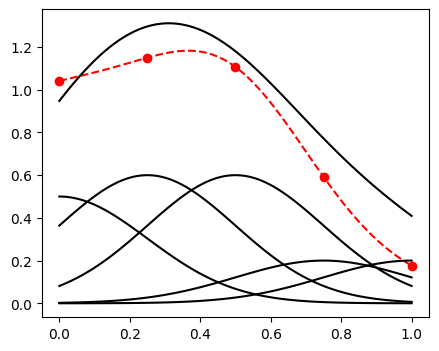

In [3]:
alpha = [0.5, 0.6, 0.6, 0.2, 0.2]
ls = 0.25
def k(x, z, ls=1):
    return np.exp(-(x-z)**2 / (2 * ls ** 2))

def basis_function(x, i):
    # function centered on i-th training point
    return alpha[i]*np.array([k(this_x, x_train[i], ls=ls) for this_x in x])

def f_hat(x):
    # total prediction
    return np.sum([basis_function(x, i) for i in range(n)], axis=0)

plt.plot(X, f(X), color="red", linestyle="dashed")
plt.scatter(x_train, f(x_train), color="red")

plt.plot(X, f_hat(X), color="black")

# plot the basis functions separately, so we can see them
for i in range(n):
    plt.plot(X, basis_function(X, i), color="black")




alpha: [0.82 0.4  0.8  0.18 0.06]


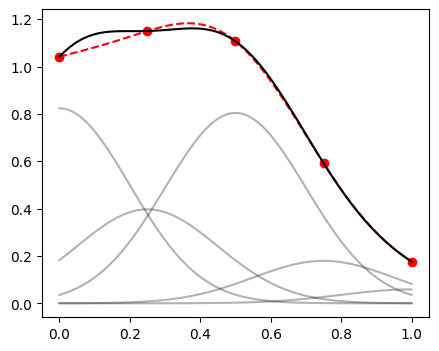

In [4]:
X = np.linspace(0, 1, 100)
n = 5
x_train = np.linspace(0, 1, n)
y_train = f(x_train)

ls = 0.2

K = [[k(z, x, ls=ls) for z in x_train] for x in x_train]
alpha = np.linalg.inv(K) @ y_train  # @ is matrix multiplication

def basis_function(x, i):
    # function centered on i-th training point
    return alpha[i]*np.array([k(this_x, x_train[i], ls=ls) for this_x in x])

def f_hat(x):
    # total prediction
    return np.sum([basis_function(x, i) for i in range(n)], axis=0)

plt.plot(X, f(X), color="red", linestyle="dashed")
plt.scatter(x_train, f(x_train), color="red")

plt.plot(X, f_hat(X), color="black")

# plot the basis functions separately, so we can see them
for i in range(n):
    plt.plot(X, basis_function(X, i), alpha=0.3, color="black")

print(f"alpha: {np.round(alpha, 2)}")

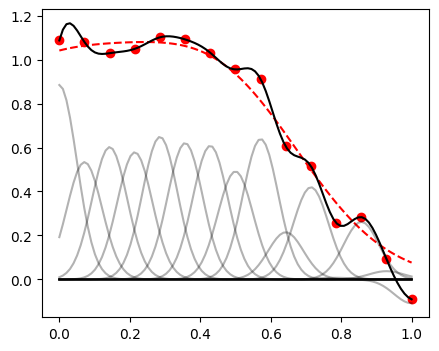

In [5]:
def f(x):
    return np.exp(-x**2/0.3) + 0.5*np.exp(-(x-0.5)**2/0.1)

X = np.linspace(0, 1, 100)
n = 15
x_train = np.linspace(0, 1, n)
y_train = f(x_train) + 0.1*np.random.normal(scale=0.6, size=len(x_train))  # add gaussian noise

plt.plot(X, f(X), color="red", linestyle="dashed")
plt.scatter(x_train, y_train, color="red")

ls = 0.05

K = [[k(z, x, ls=ls) for z in x_train] for x in x_train]
alpha = np.linalg.inv(K) @ y_train

def basis_function(x, i):
    # function centered on i-th training point
    return alpha[i]*np.array([k(this_x, x_train[i], ls=ls) for this_x in x])

def f_hat(x):
    # total prediction
    return np.sum([basis_function(x, i) for i in range(n)], axis=0)


plt.plot(X, f_hat(X), color="black")

# plot the basis functions separately, so we can see them
for i in range(n):
    plt.plot(X, basis_function(X, i), alpha=0.3, color="black")



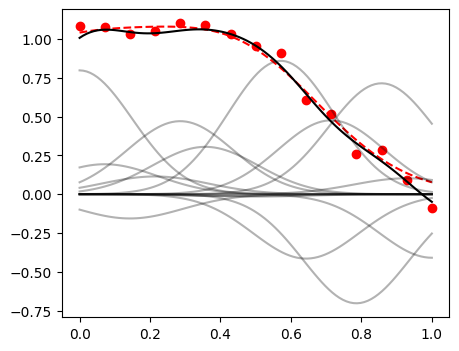

In [6]:
plt.plot(X, f(X), color="red", linestyle="dashed")
plt.scatter(x_train, y_train, color="red")


ls = 0.15
nl = 0.1

K = np.array([[k(z, x, ls=ls) for z in x_train] for x in x_train])
alpha = np.linalg.inv(K + nl*np.identity(K.shape[0])) @ y_train

def basis_function(x, i):
    # function centered on i-th training point
    return alpha[i]*np.array([k(this_x, x_train[i], ls=ls) for this_x in x])

def f_hat(x):
    # total prediction
    return np.sum([basis_function(x, i) for i in range(n)], axis=0)


plt.plot(X, f_hat(X), color="black")

# plot the basis functions separately, so we can see them
for i in range(n):
    plt.plot(X, basis_function(X, i), alpha=0.3, color="black")



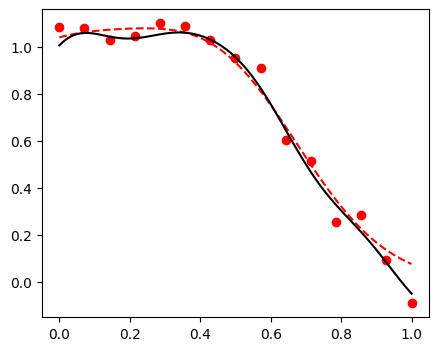

In [7]:
def kernelf_gaussian(x, z=None, ls=1.0):
    """Compute kernel matrix with Gaussian kernel.
    
    Args:
        x: iterable, row of kernel matrix
        z: (optional) iterable, column of kernel matrix. if None, use x
        ls: length scale
    
    """
    if z is None:
        z = x

    return np.array([[np.exp(-(this_x-this_z)**2 / (2 * ls ** 2)) for this_z in z] for this_x in x])

class KRR():
    def __init__(self, ls, nl, kernelf=kernelf_gaussian):
        self.ls = ls
        self.nl = nl
        self.kernelf = kernelf
        
    def train(self, x, y):
        self.x_train = x
        K = self.kernelf(x, ls=self.ls)
        self.alpha = np.linalg.inv(K + self.nl*np.identity(K.shape[0])) @ y
        
    def predict(self, z):
        L = self.kernelf(self.x_train, ls=self.ls, z=z)
        return L.T @ self.alpha

krr = KRR(ls=0.15, nl=0.1)

krr.train(x_train, y_train)

plt.plot(X, f(X), color="red", linestyle="dashed")
plt.scatter(x_train, y_train, color="red")

plt.plot(X, krr.predict(X), color="black")


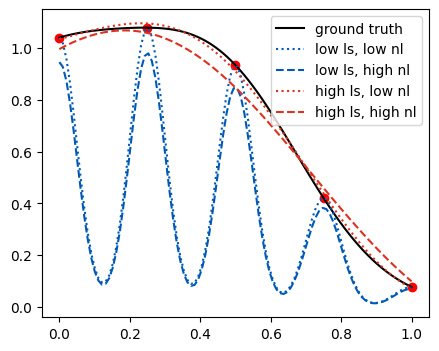

In [8]:
def train_and_predict(krr, x_train, y_train, x_predict):
    krr.train(x_train, y_train)
    return krr.predict(x_predict)
    

def f(x):
    return np.exp(-x**2/0.3) + 0.5*np.exp(-(x-0.5)**2/0.1)

X = np.linspace(0, 1, 100)
n = 5
x_train = np.linspace(0, 1, n)
y_train = f(x_train)

plt.plot(X, f(X), color="black", linestyle="solid", label="ground truth")
plt.scatter(x_train, y_train, color="red")

plt.plot(X, train_and_predict(KRR(ls=0.05, nl=1e-3), x_train, y_train, X), color="#005AB5", linestyle="dotted", label="low ls, low nl")
plt.plot(X, train_and_predict(KRR(ls=0.05, nl=1e-1), x_train, y_train, X), color="#005AB5", linestyle="dashed", label="low ls, high nl")
plt.plot(X, train_and_predict(KRR(ls=0.5, nl=1e-3), x_train, y_train, X), color="#DC3220", linestyle="dotted", label="high ls, low nl")
plt.plot(X, train_and_predict(KRR(ls=0.5, nl=1e-1), x_train, y_train, X), color="#DC3220", linestyle="dashed", label="high ls, high nl")
plt.legend()

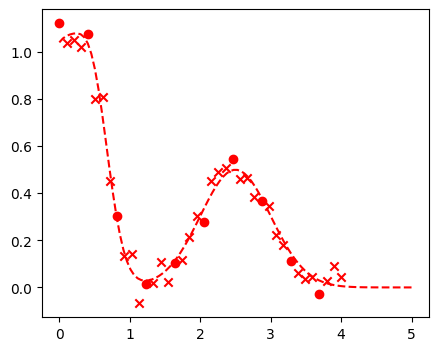

In [9]:
def f(x):
    return np.exp(-x**2/0.3) + 0.5*np.exp(-(x-0.5)**2/0.1) + 0.5*np.exp(-(x-2.5)**2/0.5) 


def f_with_noise(x):
    return f(x) + np.random.normal(scale=0.05, size=len(x))

np.random.seed(1)

X = np.linspace(0, 5, 100)
Y = f(X)

x_train = np.linspace(0, 4, 40)

idx_train = np.arange(len(x_train))
idx_valid_test = idx_train[::4]
idx_valid_train = np.setdiff1d(idx_train, idx_valid_test)

plt.plot(X, f(X), color="red", linestyle="dashed")

y_train = f_with_noise(x_train)
y_valid_test = y_train[idx_valid_test]
y_valid_train = y_train[idx_valid_train]

x_valid_train = x_train[idx_valid_train]
x_valid_test = x_train[idx_valid_test]

plt.scatter(x_valid_train, y_valid_train, color="red", marker="x")
plt.scatter(x_valid_test, y_valid_test, color="red", marker="o")


In [10]:
def rmse(true, pred):
    """Root mean squared error."""
    return np.sqrt(np.mean((true - pred) ** 2))

def mae(true, pred):
    """Mean absolute error."""
    return np.mean(np.fabs(true - pred))


def compute_loss(ls, nl, lossf=rmse):
    krr = KRR(ls, nl)
    krr.train(x_valid_train, f(x_valid_train))
    y_hat = krr.predict(x_valid_test)
    
    return lossf(f(x_valid_test), y_hat)

In [11]:
from collections import deque
guesses = deque([], 10)  # will store 10 guesses, deleting the oldest one when more are added

def guess(ls, nl, quiet=False):
    guesses.append((ls, nl, compute_loss(ls, nl, lossf=rmse), compute_loss(ls, nl, lossf=mae)))
    
    if not quiet:
        print("guesses  (last is current)")
        print(f"{'ls':<10}| {'nl':<10}| {'rmse':<10}| {'mae':<10}")
        for ls, nl, l_rmse, l_mae in guesses:
            print(f"{ls:<10.5f}| {nl:<10.5f}| {l_rmse:<10.5f}| {l_mae:<10.5f}")

In [12]:
mean = np.mean(Y)
std = np.std(Y)

print(f"std = {std:.3f}, mean = {mean:.3f}")
print(f"RMSE if we predict mean = {rmse(Y, mean * np.ones_like(Y)):.3f}")
print(f"MAE if we predict mean = {mae(Y, mean * np.ones_like(Y)):.3f}")
print()

for i in range(10):
    ls = 2*np.random.random()
    nl = 0.01*np.random.random()
    guess(ls, nl, quiet=True)
guess(1, 1)

std = 0.329, mean = 0.280
RMSE if we predict mean = 0.329
MAE if we predict mean = 0.262

guesses  (last is current)
ls        | nl        | rmse      | mae       
1.38880   | 0.00414   | 0.10375   | 0.06916   
0.09991   | 0.00536   | 0.15031   | 0.06638   
1.32759   | 0.00515   | 0.09853   | 0.06571   
1.88919   | 0.00587   | 0.15341   | 0.11689   
1.80680   | 0.00137   | 0.14192   | 0.09455   
0.27855   | 0.00807   | 0.02511   | 0.00973   
0.79535   | 0.00165   | 0.03474   | 0.02533   
1.85502   | 0.00348   | 0.15370   | 0.11005   
1.50162   | 0.00726   | 0.12728   | 0.08717   
1.00000   | 1.00000   | 0.17306   | 0.14410   


In [14]:
guess(0.5, 0.5)

guesses  (last is current)
ls        | nl        | rmse      | mae       
1.32759   | 0.00515   | 0.09853   | 0.06571   
1.88919   | 0.00587   | 0.15341   | 0.11689   
1.80680   | 0.00137   | 0.14192   | 0.09455   
0.27855   | 0.00807   | 0.02511   | 0.00973   
0.79535   | 0.00165   | 0.03474   | 0.02533   
1.85502   | 0.00348   | 0.15370   | 0.11005   
1.50162   | 0.00726   | 0.12728   | 0.08717   
1.00000   | 1.00000   | 0.17306   | 0.14410   
0.10000   | 0.10000   | 0.18301   | 0.09972   
0.50000   | 0.50000   | 0.07998   | 0.05109   


In [15]:
distances = [[np.abs(x-z) for z in x_train] for x in x_train]
guess_ls = np.median(distances) / np.sqrt(2.)
guess_nl = 1e-7

guess(guess_ls, guess_nl)

guesses  (last is current)
ls        | nl        | rmse      | mae       
1.88919   | 0.00587   | 0.15341   | 0.11689   
1.80680   | 0.00137   | 0.14192   | 0.09455   
0.27855   | 0.00807   | 0.02511   | 0.00973   
0.79535   | 0.00165   | 0.03474   | 0.02533   
1.85502   | 0.00348   | 0.15370   | 0.11005   
1.50162   | 0.00726   | 0.12728   | 0.08717   
1.00000   | 1.00000   | 0.17306   | 0.14410   
0.10000   | 0.10000   | 0.18301   | 0.09972   
0.50000   | 0.50000   | 0.07998   | 0.05109   
0.87029   | 0.00000   | 0.04023   | 0.01796   


min loss: 0.0009 at nl=2^-11.3103 and ls=2^-1.5517.


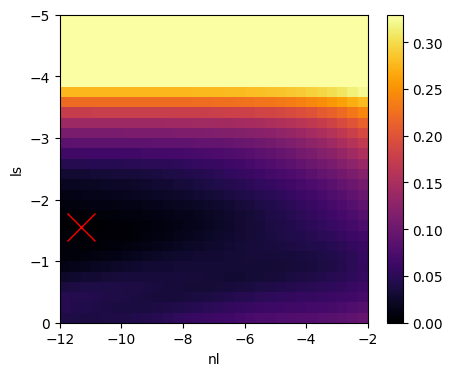

In [16]:
ls_grid = np.linspace(-5, 0, num=30)
nl_grid = np.linspace(-12, -2, num=30)

results = np.zeros((ls_grid.shape[0], nl_grid.shape[0]))

for i, ls in enumerate(ls_grid):
    for j, nl in enumerate(nl_grid):
        results[i, j] = compute_loss(ls=2**ls, nl=2**nl)

ls_range = (ls_grid[0], ls_grid[-1])
nl_range = (nl_grid[0], nl_grid[-1])

plt.imshow(results,
        extent=[nl_grid[0], nl_grid[-1], ls_grid[-1], ls_grid[0]],
        aspect=(nl_grid[-1] - nl_grid[0])/(ls_grid[-1] - ls_grid[0]),
        cmap=plt.get_cmap("inferno"))

plt.clim(0.0, std)
plt.colorbar()

# find minimum, draw as big red X
i_min, j_min = np.unravel_index(np.argmin(results), results.shape)
plt.plot(nl_grid[j_min], ls_grid[i_min], color="red", marker="x", ms=20)


plt.xlabel("nl")
plt.ylabel("ls")

plt.xlim((nl_grid[0], nl_grid[-1]))
plt.ylim((ls_grid[-1], ls_grid[0]))

best_nl = nl_grid[j_min]
best_ls = ls_grid[i_min]

print(f"min loss: {compute_loss(nl=2**best_nl, ls=2**best_ls):.4f} at nl=2^{best_nl:.4f} and ls=2^{best_ls:.4f}.")

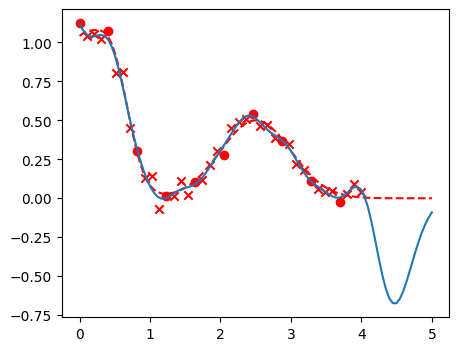

In [17]:
plt.plot(X, f(X), color="red", linestyle="dashed")
plt.scatter(x_valid_train, y_valid_train, color="red", marker="x")
plt.scatter(x_valid_test, y_valid_test, color="red", marker="o")

krr = KRR(ls=2**best_ls, nl=2**best_nl)
krr.train(x=x_train, y=y_train)

plt.plot(X, krr.predict(X))